# 4. Redes convolucionales 101

¡Bienvenidos a la cuarta sesión! Tras haber visto en la sesión anterior las diferentes implementaciones de Gradient Descent, las funciones de activación y de pérdidas y la inicialización de pesos, comenzamos hoy con las redes neuronales convolucionales, el buque insignia del deep learning!

Hoy vamos a ver:

**Redes convolucionales**
* Introducción. Casos de uso y ejemplos
* Convoluciones. Ejemplos en numpy
* CNNs. Implementación con Keras
* Extensiones al GD: Momentum, Adagrad, RMSprop, etc...
* Overfitting y regularización en Deep Learning: L1/L2-norm, Dropout, Batch normalization...


## 4.1 Introducción a las Redes Neuronales Convolucionales

En las sesiones anteriores hemos visto que una red neuronal es basicamente un aproximador de funciones universal, lo recordáis? Lo que quiere decir que en esencia, lo que hacemos con las redes neuronales es solucionar problemas tratando de encontrar la mejor aproximación posible a una función que permite solucionar nuestro problema.

Para ello disponemos de una serie de parámetros (los pesos y la bias) que vamos actualizando haciendo uso del algoritmo de backpropagation, que está basado en el gradient descent. 

Gracias a nuestras etiquetas, somos capaces de calcular el error en cada iteración y modificar los pesos para reducirlo progresivamente.

Vale, genial. Y qué es una red neuronal **convolucional**? O lo que es más importante, **qué problemas permite solucionar?**

Pues básicamente, **todos los que se puedan expresar en forma de imagen**.


Por ejemplo, supongo que la mayoría de vosotros tendréis FaceBook o lo conoceréis, os habéis fijado en que cuando vais a etiquetar a alguien os sugiere personas? Y que normalmente, acierta!?!? => **convnets al poder!**

<img src="https://image.ibb.co/kROQSd/fb_label_face.png" alt="fb_label_face" border="0" height="350">

O los que tengáis un iPhone (no sé si con Android será igual), habéis visto la carpeta "Personas" dentro de la galería? WTF!!! cómo hacen eso? son capaces de encontrar la cara en una imagen, y no contentos con eso, también son capaces de agrupar todas las caras que pertenecen a una determinada persona!! Pues sabéis qué?? => **convnets al poder!**

<img src="https://image.ibb.co/dOY3DJ/ip_face_recog.png" alt="ip_face_recog" border="0" height="350">

O quizás hayáis oído hablar de los coches autónomos, que son capaces de "leer" las señales de tráfico, incluso detectar si hay una persona cruzando la calle. A que no lo adivináis? => **convnets al poder!**

<img src="https://image.ibb.co/e9cify/self_driving_cars_detection.jpg" alt="self_driving_cars_detection" border="0" height="350">

Y estos son solo algunos ejemplos con los que tratáis día a día, pero existen muchos más. Por ejemplo, yo estoy trabajando en detección de glaucoma en imágenes de OCT de la retina, que son como una especie de TAC de la retina.

De hecho, las *CNN* están muy de moda para resolver problemas de imagen médica. Esto se debe a una característica que tienen las CNNs y que las hacen perfectas para este cometido (y otros muchos). Esta característica es que son capaces, por sí solas, de encontrar las características adecuadas para posteriormente clasificar las imágenes correctamente.

Cualquiera de vosotros que le guste un poco el tema y haya mirado sabrá que dentro del ámbito de la visión por computador el deep learning ha supuesto un antes y un después, y si no os lo creéis, mirad esta imagen:

<img src="https://image.ibb.co/k48yfy/imagenet_cv_vs_dl.jpg" alt="imagenet_cv_vs_dl" border="0">

Vale, estupendo. Pero **qué es exactamente una CNN**?

Pues es una red neuronal en la que se introducen nuevos tipos de capas, donde la más importante es **la convolucional**.

**Y qué es la convolución?**

Vamos a verlo!!

## 4.2 La convolución

Estrictamente, la convolución se utiliza sobretodo en tratamiento de señal, y es una operación matemática que permite combinar dos señales. En tratamiento digital de la señal se emplea para conocer qué le va a pasar a una señal después de "pasar" por un determinado dispositivo. Por ejemplo, para saber cómo cambia nuestra voz tras haber pasado por el micrófono de nuestro movil, podríamos calcular la convolucion de nuestra voz con la respuesta al impulso del micrófono.

Si sentís curiosidad, aquí tenéis un muy buen recurso: http://includeblogh.blogspot.com.es/2010/12/convolucion-pero-si-es-muy-facil-parte.html

Fuera de lo estrictamente técnico, las redes neuronales convolucionales se han hecho *famosas* gracias a su capacidad para detectar patrones que después clasifican. Pues bien, esos **detectores de patrones son las convoluciones**.

Vamos a ver cómo entiende un ordenador una imagen:

<img src="https://image.ibb.co/eXT60y/img_rep.png" alt="img_rep" border="0" width="400">
<img src="https://image.ibb.co/dG5m0y/img_rep_2.png" alt="img_rep_2" border="0" width="600">

Como podéis ver, una imagen en color se representa como una matriz de 3 dimensiones: **Ancho** x **Alto** x **Canales**. Existen varias formas de representar las imágenes, pero la más común es usando el espacio de colores RGB. Estgo quiere decir que un ordenador al final ve 3 matrices de Ancho x Alto, donde la primera le indica las cantidades de rojo que tiene la imagen, la segunda, de verde, y la tercera, de azul.

Si la imagen fuese en escala de grises, el ordenador la vería como una sola matriz bidimensional de Ancho x Alto.

Por último, los valores que pueden tomar los elementos de la matriz dependen del tipo de variable utilizada. Las más comunes son:

* si usamos enteros de 8 bits: pueden ir de 0 a 255
* si usamos floats: de 0 a 1

Me interesa que entendáis muy bien esto, así que si hay alguna duda podéis decirmelo ahora o al acabar la clase, pero no os quedéis con ella!


Pues bien, sabiendo que la imagen es una matriz, lo que hace la convolución es definir un **filtro** o **kernel** por el que va a multiplicar a la matriz de la imagen. Fijaos en la siguiente imagen:

<img src="https://image.ibb.co/czOQSd/convolution_kernel.png" alt="convolution_kernel" border="0">

Se define un kernel, de 3x3 pixels, y se multiplica a la input_image. ¿Qué es lo que pasa? Que el kernel es mucho más pequeño que la imagen, por lo que para poder multiplicar a toda la imagen, primero situamos el kernel sobre los primeros 3x3 pixels, luego lo movemos uno hacia la derecha, luego otro, luego otro... y vamos calculando **la suma de la multiplicación de cada elemento del kernel por cada pixel correspondiente de la imagen**. El resultado de esta operación se almacena en la imagen de salida, como podéis observar.

Aquí podéis verlo más claro:

<img src="https://image.ibb.co/e0GSqy/convolution.png" alt="convolution" border="0">

Y ahora con un ejemplo animado para que veáis el proceso:

<img src="https://image.ibb.co/eqGy0y/cnn_stride1.gif" alt="cnn_stride1" border="0">

<!--
Y por último, un ejemplo con una imagen en color, es decir, que tiene 3 canales, R, G y B, con lo cual, tiene 3 matrices bidimensionales, una para cada canal. En este caso, como podéis ver, la convolución se aplica a cada canal por separado y así se obtiene como resultado una matriz de 3 dimensiones, con el resultado de la convolución para cada canal.

**En el caso de las capas convolucionales, los resultados de los diferentes canales se suman**, además de la bias, con lo que el resultado es una imagen de un solo canal (una matriz bidimensional):

<img src="https://image.ibb.co/bHU4Ly/convolution_rgb.gif" alt="convolution_rgb" border="0">

En este enlace podéis verlo más en detalle: http://cs231n.github.io/assets/conv-demo/index.html
-->

Vale, ya sabéis la teoría, pero os he dicho que son detectores de patrones y de momento con esto no estamos detectando nada, simplemente multiplicando y sumando cosas, no?

Vamos a ver unos ejemplos a ver qué es lo que pasa cuando hacemos estas mutiplicaciones y sumas ;-)

In [0]:
import numpy as np
from scipy import signal
from scipy import misc
ascent = misc.ascent()
kernel = np.array([[-1, 0, +1],
                   [-1, 0, +1],
                   [-1, 0, +1]])
grad = signal.convolve2d(ascent, kernel, boundary='symm', mode='same')

In [0]:
import matplotlib.pyplot as plt

# función para mostrar dos imágenes juntas
def plot_two(img_orig, img_conv):
  fig, (ax_orig, ax_mag) = plt.subplots(1, 2, figsize=(20, 50))
  ax_orig.imshow(img_orig, cmap='gray')
  ax_orig.set_title('Original')
  ax_orig.set_axis_off()
  ax_mag.imshow((img_conv), cmap='gray')
  ax_mag.set_title('Gradiente')
  ax_mag.set_axis_off()

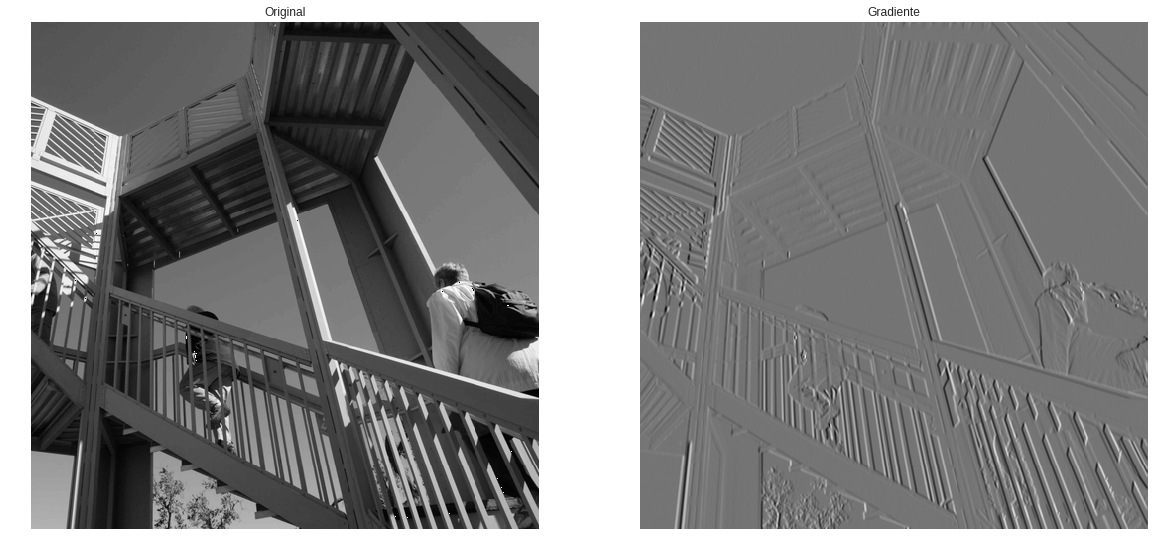

In [3]:
plot_two(ascent, grad)

¿Cómo lo véis? Parece que estamos detectando algunos bordes, verdad? Y qué son los bordes, sino líneas? Vaya! Parece que tenemos un detector de líneas verticales!! ;-)

Cómo podríamos conseguir uno de líneas horizontales?

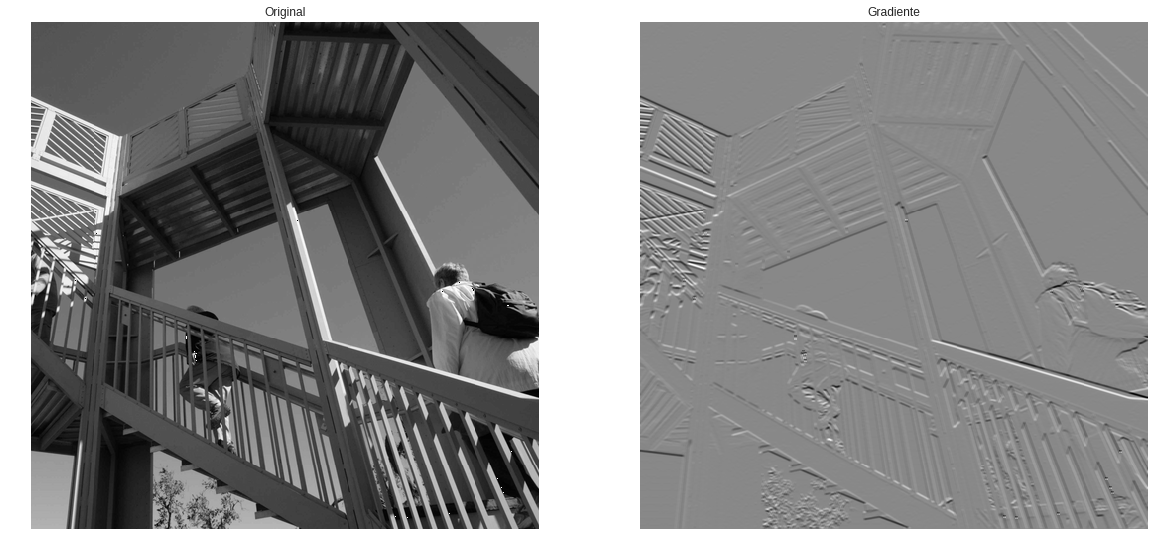

In [4]:
kernel = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [+1, +1, +1]])
grad_v = signal.convolve2d(ascent, kernel, boundary='symm', mode='same')
plot_two(ascent, grad_v)

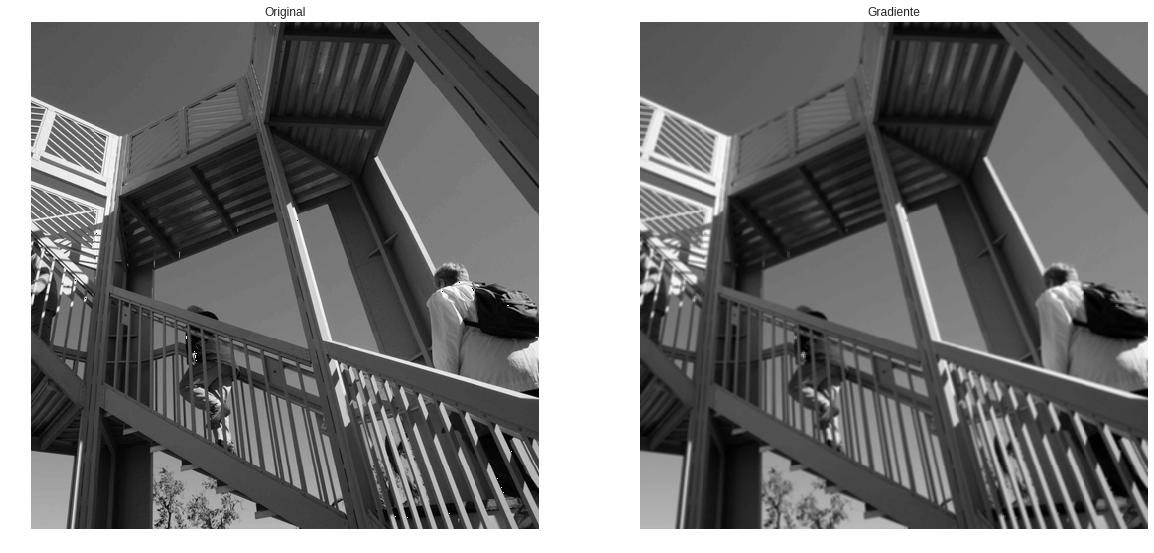

In [5]:
kernel = 1/9 * np.ones((3,3))
grad_v = signal.convolve2d(ascent, kernel, boundary='symm', mode='same')
plot_two(ascent, grad_v)

** Estos son algunos de los kernels más utilizados en CV tradicional **

<img src="https://image.ibb.co/jcgw0y/kernels.png" alt="kernels" border="0">

Vamos a ver los ejemplos nosotros mismos:

(-0.5, 99.5, 99.5, -0.5)

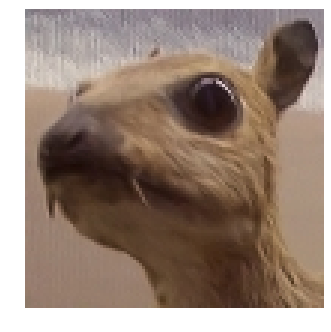

In [6]:
# cargamos y mostramos la imagen original
url_img = 'https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png'
from urllib.request import urlopen 
from io import BytesIO
from PIL import Image
file = BytesIO(urlopen(url_img).read()) 
img = np.asarray(Image.open(file), dtype='uint8')
plt.imshow(img)
plt.axis('off')

In [0]:
def convolve3d(img, kernel):
  img_out = np.zeros(img.shape)
  for i in range(img.shape[-1]):
     img_out[:,:,i] = signal.convolve2d(img[:,:,i], kernel, boundary='symm', mode='same')
  return img_out.astype('uint8')


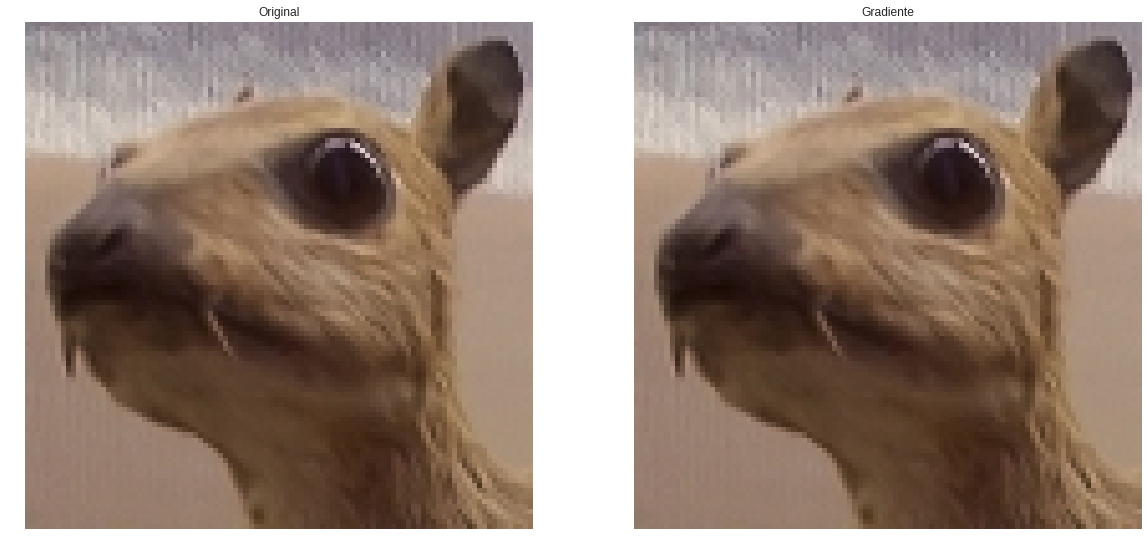

In [8]:
# Probamos con el kernel identidad
kernel = [[0, 0, 0],
         [0, 1, 0],
         [0, 0, 0]]
img_ki = convolve3d(img, kernel)
plot_two(img, img_ki)

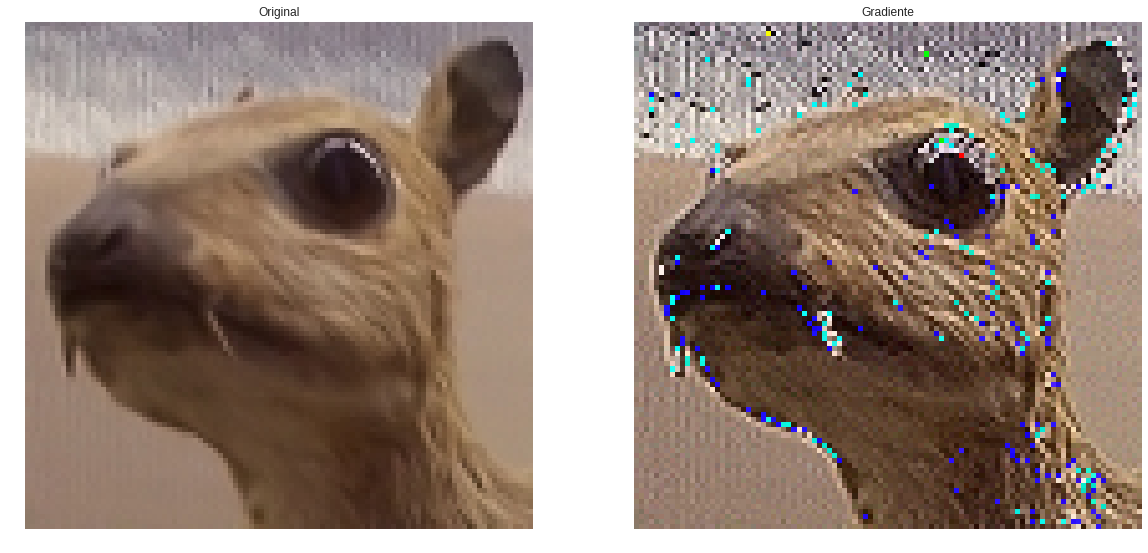

In [9]:
# Probamos con el kernel sharpen
kernel = [[0, -1, 0],
         [-1, 5, -1],
         [0, -1, 0]]
img_ks = convolve3d(img, kernel)
plot_two(img, img_ks)

Más ejemplos: http://aishack.in/tutorials/image-convolution-examples/

Vale, muy guays estas transformaciones, pero...

## ¿Cómo es capaz la convolución de detectar un determinado patrón?

<!-- https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/ -->

### Ejemplo detección patrones

** Nuestro filtro:**

<img src="https://image.ibb.co/iMo97d/conv_patt_det_1.png" alt="conv_patt_det_1" border="0">

** Nuestra imagen:**

<img src="https://image.ibb.co/jNkYYJ/conv_patt_det_2.png" alt="conv_patt_det_2" border="0">

**¿Qué pasa si nuestro filtro cae en la "espalda" de la rata?**

<img src="https://image.ibb.co/nugJ0y/conv_patt_det_3.png" alt="conv_patt_det_3" border="0">

$Resultado = 30·0 + 30·50 + 30·20 + 30·50 + 30·50 + 30·50=6600$ es un número muy alto!!

**¿Qué pasa si nuestro filtro cae en la "cabeza" de la rata?**

<img src="https://image.ibb.co/hmp5fy/conv_patt_det_4.png" alt="conv_patt_det_4" border="0">

$Resultado = 30·0 + 30·0 + 30·0 + 30·0 + 30·0 + 30·0=0$ es un número muy bajo!!


### Así es como la convolución es capaz de detectar patrones.

## 4.3 Las CNNs

Ahora que ya sabéis lo que es la convolución, vamos a ver qué son las redes neuronales convolucionales y cómo funcionan.

<img src="https://image.ibb.co/kXj0cd/cnn_feat_class.jpg" alt="cnn_feat_class" border="0">
<img src="https://image.ibb.co/fKGU7d/cnn_intro.png" alt="cnn_intro" border="0">

En estas imagenes podéis ver la **arquitectura típica de una red neuronal convolucional**.

Como entrada, tenemos la imagen que queremos clasificar, en este caso, de nuestro gato negro. Como ya sabéis, esto no es otra cosa que una matriz de Ancho x Alto x 3 (porque es RGB). 

Después empiezan los "bloques convolucionales". Estos bloques están compuestos normalmente por:

* Capas **convolucionales**, que ya hemos visto como funcionan
* Capas de **pooling**, que lo que hacen es *diezmar* el contenido de la salida de la capa convolucional

Antes hemos visto como funciona la convolución: definimos un kernel o filtro que sirve para resaltar determinadas estructuras de la imagen. Y os estaréis preguntando: cómo defino yo un filtro que me permita averiguar qué la imagen de entrada tiene un gato negro?

Pues aquí está la **magia** de las CNNs!! Nosotros **no tenemos que definir ningún filtro, los aprende la red automáticamente gracias al backpopagation!!**

Os acordáis de lo pesado que fui con el gradient descent y el back propagation? Lo entendéis ahora? :-D

Por otra parte, os dáis cuenta de que nuestra **CNN tiene dos etapas**: **feature extractor** y **classifier**? Esto se debe a que la red, primero extrae unos determinados patrones haciendo uso de la primera etapa, que son los que mejor le vienen al posterior clasificador para hacer su trabajo con la mayor precisión posible.

La etapa de **feature extraction** va de menos a más, es decir, las primeras capas convolucionales detectan lineas en diferentes orientaciones, las siguientes detectan ya formas y colores, las siguientes patrones más complejos, etc. Fijaos en estas imágenes:

<img src="https://image.ibb.co/dz5DFy/vis_cnn_layer2.png" alt="vis_cnn_layer2" border="0" height="300">

<img src="https://image.ibb.co/kQ4UoJ/vis_cnn_layer3.png" alt="vis_cnn_layer3" border="0" height="300">

<img src="https://image.ibb.co/n69Jhd/vis_cnn_layer4.png" alt="vis_cnn_layer4" border="0">


**Así que al final, lo que tenemos, es una red que aprende sola, con la que no hace falta que nos preocupemos de qué características escogemos para clasificar, ya que las elige ella sola.**

¿Y cómo va aprendiendo? De la misma forma que una red neuronal tradicional.

<img src="https://image.ibb.co/fYyhqy/cnn_learning.png" alt="cnn_learning" border="0">

De hecho, la segunda etapa, la de clasificador, está compuesta por capas **densas**, que si recordáis lo que dijimos anteriormente, son las capas que se usan en las redes neuronales tradicionales. Por lo que finalmente podría entenderse una CNN como un conjunto de etapas convolucionales acopladas a una red neuronal tradicional, que es la que clasifica los patrones extraídos por las convoluciones y devuelve unas probabilidades para cada clase.

## Tipos de capas en una CNN

### Convolucionales

Estas capas son las encargadas de aplicar la convolución a nuestras imágenes de entrada para encontrar los patrones que más tarde permitirán clasificarla.

Para ello, se define:
* el número de filtros/kernels a aplicar a la imagen: el número de matrices por las que se van a convolucionar las imágenes de entrada
* el tamaño de estos filtros: 99% de las veces son cuadrados, de 3x3, 5x5, etc.

Aquí podéis ver el esquema general, en el que se ve como una imagen de entrada dada se convoluciona por cada filtro, y la salida son mapas de activación 2D. Esto quiere decir que si la imagen de entrada es RGB, tendrá 3 canales. Por lo tanto, convolucionaremos cada filtro por cada canal, y luego sumaremos los resultados, para reducir de 3 canales a 1 solo.

<img src="https://image.ibb.co/bXBQTJ/conv_layer_1.png" alt="conv_layer_1" border="0">

En este demo podéis ver lo que os acabo de explicar:

<img src="https://image.ibb.co/bHU4Ly/convolution_rgb.gif" alt="convolution_rgb" border="0">

Como la entrada tiene 3 canales, R, G y B, esto significa que nuestra imagen de entrada viene definida como 3 matrices bidimensionales, una para cada canal. Así que lo que hace la capa convolucional es aplicar la convolución por separado a cada canal, obtiene el resultado de cada canal, y luego los suma para obtener una única matriz 2D que es llamada mapa de activaciones.

En este enlace podéis verlo más en detalle: http://cs231n.github.io/assets/conv-demo/index.html

Ahora imaginaos que nuestra capa tiene 4 filtros:

<img src="https://image.ibb.co/nb0DYJ/conv_layer_2.png" alt="conv_layer_2" border="0">

Además del número de filtros y el tamaño, las capas convolucionales tiene otro parámetro importante: **el stride**.

Fijaos en el cambio:

<img src="https://image.ibb.co/eqGy0y/cnn_stride1.gif" alt="cnn_stride1" border="0" height="250">
<img src="https://image.ibb.co/cXL2Sd/cnn_stride2.gif" alt="cnn_stride2" border="0" height="250">

Por último, es **importante** que conozcáis el concepto de **receptive field**.

<img src="https://image.ibb.co/cAYgnd/recept_field.jpg" alt="recept_field" border="0">
<img src="https://image.ibb.co/cFsfDJ/receptive_field.png" alt="receptive_field" border="0">

En el caso de las capas convolucionales, las reuronas de la salida se hayan conectadas solo a una región local de la imagen de entrada. Así que, en este ejemplo, el campo receptivo es de 5x5x3, porque el kernel es de 5x5x3 (la imagen es RGB). Se puede entender como "lo que ve" la red.

Con las capas densas ocurre lo contrario, todas las neuronas se hayan conectadas con todos los elementos anteriores. Sin embargo, las neuronas siguen funcionando exactamente igual, lo único es que en la entrada ya no tienen la imagen completa, sino una región de la misma.

MÁS INFO: http://cs231n.github.io/convolutional-networks/#layers

### Pooling

Las capas de pooling se utilizan para ir reduciendo el tamaño de nuestros mapas de activaciones, ya que de otra forma no sería posible ejecutarlos en muchas GPUs. Además, también ayuda a reducir el overfitting.

Los dos tipos de pooling más comunes son:
* max pooling: calcula el máximo de los elementos
* average pooling: calcula la media de los elementos

Hay que tener en cuenta que esto se realiza para cada mapa de activaciones de nuestro volumen, es decir, no interviene para nada la dimensión depth en los cálculos.

Veamos un ejemplo de un maxpooling con diferentes strides:

<img src="https://image.ibb.co/b6tTYJ/cnn_pooling.png" alt="cnn_pooling" border="0">


### Normalización

Realizan operaciones sobre los mapas de activaciones. La más común es la de BatchNormalization, que veremos más adelante.


### Fully-connected o densas

Las de siempre.

### BONUS: Locally-connected Layers

Ya sabéis como van las capas convolucionales, verdad? Imaginad que tenemos una imagen de entrada de 32x32, y nuestra red tiene 5 capas convolucionales, cada una con 5 filtros de tamaño 3x3.

De acuerdo, pues entonces nuestra red aprenderá, para cada capa, 5 matrices 3x3. Esto es así porque el filtro **recorre la imagen**. Esto se basa en la asunción de que si un determinado filtro es bueno para detectar algo en la posición (x, y) de la imagen, también debería ser bueno para la posición (x2,y2), verdad?

Pues bien, esta asunción es válida casi siempre, porque normalmente no sabemos dónde van a estar nuestras características situadas en la imagen.

No obstante, si por ejemplo tuviesemos un dataset en las que aparecen caras centradas en la imagen, podríamos querer que los filtros fuesen diferentes para las zonas de los ojos que para las de la nariz o la boca, verdad? Mirad:

<img src="https://image.ibb.co/iM6w3J/locally_connected_layers_conv.png" alt="locally_connected_layers_conv" border="0">
<img src="https://image.ibb.co/ce5Zqy/locally_connected_layers.png" alt="locally_connected_layers" border="0">


En este caso, si sabemos dónde van a estar localizadas nuestras características, tiene más sentido tener un filtro para cada zona, no? Pues sí, pero qué pasa? 

Que donde antes teníamos que aprender 5 filtros de 3x3 por capa, lo que nos da un total de $5·3·3=45$ parámetros, ahora tendríamos que aprender: $32·32·5·3·3=46080$ parámetros. Fijáos qué diferencia. Con lo cual, a no ser que sepamos dónde queremos buscar los patrones y que van a ser diferentes y siempre van a estar en la misma posición, merece la pena que usemos capas convolucionales en vez de localmente conectadas.

Por cierto, mirad la imagen a continuación: las capas que más parámetros tienen son las densas!!! Tiene sentido, verdad? En ellas, todas las neuronas se interconnectan con todas las de la siguiente capa.

<img src="https://image.ibb.co/jbCaxd/comparison_weight_sharing.png" alt="comparison_weight_sharing" border="0">

Pero basta de cháchara, vamos a por nuestra primera red convolucional!!!

### Ejemplo 1

**Vamos a implementar una red que permita diferenciar entre 10 tipos de objetos**. Para ello, emplearemos el dataset CIFAR-10, que consta de 60.000 imágenes en color, de 32x32 píxels, repartidas en las 10 clases que podéis apreciar a continuación. El dataset está dividido en 50.000 imágenes para entrenamiento y 10.000 para test.

<img src="https://image.ibb.co/eCtwiJ/cifar10.png" alt="cifar10" border="0">

Para esta implementación no vamos a utilizar TensorFlow, sino Keras, que es un framework que funciona por encima de TF y aporta flexibilidad, rapidez y facilidad de uso. Vamos a ir viéndolo sobre la marcha.

In [1]:
# Vamos a implementar una red que permita diferenciar entre 10 tipos de objetos
# Dataset original e info: https://www.cs.toronto.edu/~kriz/cifar.html for more information

# imports necesarios
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical

# para hacerlo reproducible
np.random.seed(42)

# cargamos el dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Using TensorFlow backend.


165158912/170498071 [============================>.] - ETA: 1s

170500096/170498071 [==============================] - 47s 0us/step


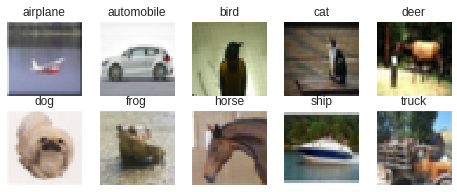

In [2]:
# vamos a ver algunas imágenes de cada clase
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(Y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num,::]
  ax.set_title(class_names[i])
  #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
  plt.imshow(im)
plt.show()

In [3]:
# Inicializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test, to_categorical(Y_test)))

# Evaluamos el modelo
scores = model.evaluate(X_test, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
39552/50000 [======================>.......] - ETA: 17s - loss: 14.5088 - acc: 0.0988

50000/50000 [==============================] - 88s 2ms/step - loss: 14.4937 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 84s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
 1664/50000 [..............................] - ETA: 1:18 - loss: 14.1130 - acc: 0.1244

50000/50000 [==============================] - 84s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
38400/50000 [======================>.......] - ETA: 18s - loss: 14.5105 - acc: 0.0997

50000/50000 [==============================] - 84s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 84s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
 1408/50000 [..............................] - ETA: 1:18 - loss: 14.6643 - acc: 0.0902

50000/50000 [==============================] - 84s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
38400/50000 [======================>.......] - ETA: 18s - loss: 14.4916 - acc: 0.1009

50000/50000 [==============================] - 84s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/10
50000/50000 [==============================] - 84s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/10
 1280/50000 [..............................] - ETA: 1:19 - loss: 14.3300 - acc: 0.1109

50000/50000 [==============================] - 84s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/10
38144/50000 [=====================>........] - ETA: 19s - loss: 14.4955 - acc: 0.1007

10000/10000 [==============================] - 7s 659us/step
Loss: 14.506
Accuracy: 0.100


Vaya!!! Qué desilusión!! 0.1 de acuracy, teniendo en cuenta que hay 10 clases, tiene toda la pinta de estar prediciendo la misma clase para todas las muestras! Lo que significa que algo está fallando estrepitosamente.

Alguien tiene alguna idea de qué puede ser?

Os doy una pista: está relacionado con la **materia prima.**

### 4.3.1 Pre-procesamiento de la materia prima

Lo primero de todo es preprocesar los datos para facilitarle la faena lo más posible a nuestra red. Si no, puede pasarnos como lo que nos acaba de pasar, que al tener datos que van de 0 a 255, la red nunca llegue a aprender nada.

Para llevar a cabo este preprocesamiento, se suelen hacer dos cosas:

* **Centrar los datos**: calcular la media del dataset y restársela. Cuando trabajamos con imágenes, se puede calcular la media completa del dataset y restársela directamente, o se puede calcular la media de cada canal de la imagen y restárselo a cada canal.

* **Normalizar los datos**: esto se hace para conseguir que todos los datos tengan aproximadamente la misma escala. Las dos formas más comunes de hacerlo son:
 * Dividir cada dimensión por su desviación estándar, después de haber sido centrados los datos (restado la media)
 * Normalizar de forma que el minimo y el máximo de cada dimensión sean -1 y 1. Esto solo tiene sentido si partimos de unos datos con diferentes escalas pero que nosotros sabemos que deberían ser parecidas, es decir, que tienen una importancia parecida para el algoritmo. En el caso de las imágenes, sabemos que los valores que pueden tomar van de 0 a 255, con lo cual no es estrictamente necesario normalizar, ya que los valores ya están en una escala similar.

<center><img src="https://image.ibb.co/e765Ay/cnn_preprocessing.jpg" alt="cnn_preprocessing" border="0" height="230"></center>

### IMPORTANTÍSIMO:

**La normalización se debe calcular solo con el conjunto de entrenamiento. Es decir, debemos calcular la media y la desviación estándar del conjunto de entrenamiento, y usar esos valores con el conjunto de validación y de set.**


Vamos a ver qué tal funciona nuestra red con las medidas que acabamos de ver:

In [0]:
# Centramos los datos (le restamos la media)
X_train_mean = np.mean(X_train, axis = 0)
X_train_cent = X_train - X_train_mean

# Normalizamos
X_train_std = np.std(X_train, axis = 0)
X_train_norm = X_train_cent / X_train_std

Ahora, preparamos el validation y el test data usando la media y la desviación estándar del conjunto de entrenamiento.

Ahh, espera, pero si no tenemos validation data!!! Bueno, para este ejemplo nos vale así, pero es muy importante que cuando hagamos cosas **de verdad** tengamos los 3 conjuntos:

* **entrenamiento**: para actualizar los pesos cada batch
* **validación**: comprueba la capacidad de generalización de la red en cada época-> prueba con muestras que no ha visto durante el entrenamiento, sirve simplemente para monitorizar el entrenamiento de la red a titulo informativo, pero no interviene en ningún cálculo!
* **test**: nos da una intuición de lo buena que es nuestra red al generalizar con un conjunto (más grande que el de validación) nunca visto

De acuerdo, pues vamos a preparar nuestro test set:

In [0]:
X_test_norm = (X_test - X_train_mean) / X_train_std

Ya lo tenemos todo listo! Vamos a probar nuestra red de nuevo con los datos normalizados:

In [15]:
# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.3871 - acc: 0.5083 - val_loss: 1.1446 - val_acc: 0.5969
Epoch 2/10
19328/50000 [==========>...................] - ETA: 49s - loss: 0.9917 - acc: 0.6542

50000/50000 [==============================] - 84s 2ms/step - loss: 0.9760 - acc: 0.6607 - val_loss: 1.0264 - val_acc: 0.6415
Epoch 3/10
45952/50000 [==========================>...] - ETA: 6s - loss: 0.7631 - acc: 0.7388

50000/50000 [==============================] - 84s 2ms/step - loss: 0.7626 - acc: 0.7393 - val_loss: 0.9340 - val_acc: 0.6770
Epoch 4/10
50000/50000 [==============================] - 84s 2ms/step - loss: 0.5785 - acc: 0.8061 - val_loss: 0.9155 - val_acc: 0.6870
Epoch 5/10
 3584/50000 [=>............................] - ETA: 1:15 - loss: 0.4004 - acc: 0.8756

50000/50000 [==============================] - 84s 2ms/step - loss: 0.4016 - acc: 0.8704 - val_loss: 0.9639 - val_acc: 0.6929
Epoch 6/10
39936/50000 [======================>.......] - ETA: 16s - loss: 0.2345 - acc: 0.9297

50000/50000 [==============================] - 84s 2ms/step - loss: 0.2377 - acc: 0.9274 - val_loss: 1.0377 - val_acc: 0.6929
Epoch 7/10
50000/50000 [==============================] - 84s 2ms/step - loss: 0.1223 - acc: 0.9687 - val_loss: 1.2003 - val_acc: 0.6941
Epoch 8/10
 2176/50000 [>.............................] - ETA: 1:17 - loss: 0.0626 - acc: 0.9890

50000/50000 [==============================] - 84s 2ms/step - loss: 0.0585 - acc: 0.9877 - val_loss: 1.3147 - val_acc: 0.6942
Epoch 9/10
39424/50000 [======================>.......] - ETA: 17s - loss: 0.0336 - acc: 0.9942

50000/50000 [==============================] - 84s 2ms/step - loss: 0.0352 - acc: 0.9936 - val_loss: 1.4223 - val_acc: 0.6895
Epoch 10/10
 1472/10000 [===>..........................] - ETA: 5s

10000/10000 [==============================] - 7s 677us/step
Loss: 1.516
Accuracy: 0.694


Perfecto!! Por fin funciona!! Ya tenemos nuestra primera CNN entrenada con una precisión de **~0.99 en training y ~0.7 en test**!!

Ehh... espera, esto esta lejos de ser perfecto. ¿Cómo puede ser que haya esa **diferencia** entre training y test?

Pues sí amigos, como todos estaréis pensando ya, en deep learning también existe el **over-fitting**, de hecho, incluso de una forma más pronunciada que en otras técnicas.

Para aquellos que no os acordéis de qué es el overfitting, pensad en esto:

Tenéis una red capaz de detectar perfectamente qué personaje aparece en cada momento en el capítulo 4x08 de FRIENDS. Funciona perfectamente, a las mil maravillas, para cada frame, es capaz de decir qué personajes hay en escena con un 99.3% de precisión. Es increíble!! Funciona tan bien, que os venís arriba y decidís probarlo con el 5x01. Y el resultado es que no acierta más que en un 71.2%. 

Pues bien, este fenómeno es al que se conoce como **overfitting**, y consiste en que creamos un algoritmo que **funciona muy bien en nuestro conjunto de datos, pero al que se le da tremendamente mal generalizar.**

Fijaos en la gráfica que representa la precisión en base a las épocas:

<img src="http://cs231n.github.io/assets/nn3/accuracies.jpeg" border="0" width="400">
(Fuente: http://cs231n.github.io/neural-networks-3/#accuracy)

Y mirad este ejemplo:

<img src="http://cs231n.github.io/assets/nn1/layer_sizes.jpeg" border="0" height="300">

¿Con cual os quedaríais?

Claramente, la capa con 20 capas funciona mejor que la que tiene 3 verdad? Sin embargo, lo que normalmente buscamos es que tenga una buena capacidad de generalización y que funcione bien cuando se encuentre datos nuevos. Cuál creéis que funcionará mejor en el caso de ver datos nuevos?

Por sorprendente que parezca, la de la izquierda.

Volvamos a nuestro ejemplo. En nuestro caso, seguro que a todos nos gustaría mucho más que en vez de ~99 vs ~70, consiguiesemos ~90 vs ~85, verdad?

Cómo podemos lograr esto? Con las técnicas de **normalización y regularización**.

**NOTA**: en la práctica, el único preprocesamiento que se suele hacer con las imágenes es dividir entre 255 todos sus valores. Con esto suele ser suficiente para que la red funcione correctamente, y así, no dependemos de ningún parámetro relacionado con nuestro conjunto de training.

In [0]:
# https://gist.github.com/giuseppebonaccorso/e77e505fc7b61983f7b42dc1250f31c8
# http://parneetk.github.io/blog/cnn-cifar10/

## 4.4 Corregir el over-fitting

Existen varias formas de reducir al máximo el over-fitting y así tener un algoritmo capaz de generalizar más.

### 4.4.1 BatchNormalization

La técnica conocida como Batch Normalization es una técnica desarrollada por Ioffe y Szegedy que pretende reducir el cambio de covariables interno o *Internal Covariate Shift*, lo que hace la red más robusta a malas inicializaciones.

El Internal Covariate Shift se define como el cambio en la distribucion de las activaciones de las redes debido al cambio de los parámetros de la red durante el entrenamiento. Cuanto menor sea, mejor funciona el entrenamiento de la red.

Esto lo consigue forzando las activaciones de la red a tener un valor escogido de una distribución gaussiana unitaria al principio del entrenamiento. Este proceso es posible gracias a que la normalización es una operación diferenciable.

Normalmente se inserta justo antes de que se ejecute la función de activación:

`model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(32, 32, 3)))`

`model.add(BatchNormalization())`

`model.add(Activation('relu'))`

En términos mátematicos, lo que hacemos es centrar y normalizar cada mini-batch que le llega a nuestra red.

Esta técnica se ha mostrado muy eficiente para entrenar redes más rápidamente (necesitando menos épocas)

In [0]:
# importamos la capa BatchNormalization
from keras.layers import BatchNormalization, Activation

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 99s 2ms/step - loss: 2.4923 - acc: 0.4931 - val_loss: 1.1658 - val_acc: 0.5978
Epoch 2/10
19328/50000 [==========>...................] - ETA: 56s - loss: 0.7271 - acc: 0.7536

50000/50000 [==============================] - 97s 2ms/step - loss: 0.7246 - acc: 0.7539 - val_loss: 0.9776 - val_acc: 0.6661
Epoch 3/10
45952/50000 [==========================>...] - ETA: 7s - loss: 0.2401 - acc: 0.9368

50000/50000 [==============================] - 97s 2ms/step - loss: 0.2414 - acc: 0.9358 - val_loss: 1.0149 - val_acc: 0.6719
Epoch 4/10
50000/50000 [==============================] - 97s 2ms/step - loss: 0.0486 - acc: 0.9959 - val_loss: 1.0341 - val_acc: 0.6943
Epoch 5/10
 3584/50000 [=>............................] - ETA: 1:26 - loss: 0.0150 - acc: 1.0000

50000/50000 [==============================] - 97s 2ms/step - loss: 0.0115 - acc: 0.9999 - val_loss: 1.0580 - val_acc: 0.6995
Epoch 6/10
39936/50000 [======================>.......] - ETA: 18s - loss: 0.0048 - acc: 1.0000

50000/50000 [==============================] - 97s 2ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 1.1099 - val_acc: 0.7024
Epoch 7/10
39552/50000 [======================>.......] - ETA: 19s - loss: 0.0028 - acc: 1.0000

Bueno, parece que ha mejorado mínimamente, aproximadamente un 2%. Esto que puede parecer poquísimo, en cuanto superamos el 90-95% aumentar un 1-2% se convierte en un paso de gigante.

Vamos a ver cómo podemos mejorarlo aún más con la **Regularización**.


### 4.4.2 Regularización

La regularización consiste en penalizar de alguna forma las predicciones que hace nuestra red durante el entrenamiento, de forma que no piense que el training set es la verdad absoluta y así sepa generalizar mejor cuando ve otros datasets.

Fijáos en esta gráfica:

<img src="https://image.ibb.co/b8SR2d/regularization.png" alt="regularization" border="0">

En esta gráfica podemos ver un ejemplo de overfitting, otro de underfitting y otro que es capaz de generalizar correctamente.

¿Cuál es cual?

Azul: over-fitting

Verde: buen modelo con capacidad de generalización

Naranja: under-fitting

Fijaos ahora en este ejemplo siguiendo con el de antes de las 3 redes con diferente número de neuronas. Lo que vemos ahora es la red de 20 neuronas con diferentes niveles de regularización.

<img src="http://cs231n.github.io/assets/nn1/reg_strengths.jpeg" border="0" height="300">

Podéis jugar con estos parámetros aquí:

https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html

y aquí uno mucho más completo:

https://playground.tensorflow.org/

Al final, es mucho mejor tener una red con muchas capas y aplicarle regularización, que tener una pequeña por evitar el overfitting. Esto se debe a que las redes pequeñas son funciones más sencillas que tienen menos mínimos locales, con lo cual el descenso del gradiente llega a uno u a otro dependiendo mucho de la inicialización, por lo que las pérdidas conseguidas suelen tener una gran varianza dependiendo de la inicialización. Sin embargo, las redes con muchas capas son funciones mucho más complicadas con muchos más mínimos locales que, aunque son más difíciles de alcanzar, suelen tener todos unas pérdidas similares y mejores. Si os interesa el tema: http://cs231n.github.io/neural-networks-1/#arch.

Existen muchos métodos de regularización. Aquí vamos a ver los más comunes:

### Regularización L2 (Lasso regularization)

La regularización L2 es la más común posiblemente.

Consiste en penalizar la función de pérdidas añadiendo el término $\frac{1}{2}\lambda w^2$ para cada peso, lo que resulta en $\frac{1}{2}\lambda \sum_i \sum_jw_{i,j}^2$.

El $\frac{1}{2}$ es simplemente por términos de comodidad cuando calculamos las derivadas, ya que de esta forma nos queda $\lambda w$ en vez de $2\lambda w$.

Lo que quiere decir esto es que penalizamos los pesos muy altos o dispares, y preferimos que sean todos ellos de magnitudes parecidas. Si recordáis, lo que implican los pesos es la importancia de cada neurona en el cómputo final de la predicción. Por lo tanto, haciendo esto, conseguimos que todas las neuronas importen más o menos por igual, es decir, que la red usará todas sus neuronas para hacer la predicción.

Por el contrario, si existiesen pesos muy altos para determinadas neuronas, el cálculo de la predicción tendría mucho más en cuenta a éstas, por lo que acabaríamos con una red con neuronas *muertas* que no sirven para nada.

Además, si os fijáis, introduciendo el término $\frac{1}{2}\lambda w^2$ en nuestra función de pérdidas hace que durante el descenso del gradiente se intente aproximar los pesos a cero, decayendo linealmente: $W += -\lambda \cdot W$.

Vamos a ver si conseguimos mejorar nuestra red aplicando la regularización L2:

In [0]:
# Regularización L2

# importamos la capa regularización
from keras.regularizers import l2

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 104s 2ms/step - loss: 3.6362 - acc: 0.4764 - val_loss: 1.5402 - val_acc: 0.5249
Epoch 2/10
19200/50000 [==========>...................] - ETA: 58s - loss: 1.4884 - acc: 0.5492

50000/50000 [==============================] - 99s 2ms/step - loss: 1.4405 - acc: 0.5685 - val_loss: 1.3782 - val_acc: 0.5847
Epoch 3/10
45952/50000 [==========================>...] - ETA: 7s - loss: 1.3429 - acc: 0.6087

50000/50000 [==============================] - 99s 2ms/step - loss: 1.3404 - acc: 0.6093 - val_loss: 1.3262 - val_acc: 0.6071
Epoch 4/10
50000/50000 [==============================] - 99s 2ms/step - loss: 1.2813 - acc: 0.6328 - val_loss: 1.2490 - val_acc: 0.6418
Epoch 5/10
 3584/50000 [=>............................] - ETA: 1:27 - loss: 1.1750 - acc: 0.6777

50000/50000 [==============================] - 99s 2ms/step - loss: 1.2276 - acc: 0.6512 - val_loss: 1.2669 - val_acc: 0.6330
Epoch 6/10
39936/50000 [======================>.......] - ETA: 19s - loss: 1.1750 - acc: 0.6756

50000/50000 [==============================] - 99s 2ms/step - loss: 1.1830 - acc: 0.6728 - val_loss: 1.1764 - val_acc: 0.6721
Epoch 7/10
50000/50000 [==============================] - 99s 2ms/step - loss: 1.1477 - acc: 0.6832 - val_loss: 1.1565 - val_acc: 0.6749
Epoch 8/10
 2176/50000 [>.............................] - ETA: 1:31 - loss: 1.0618 - acc: 0.7096

50000/50000 [==============================] - 99s 2ms/step - loss: 1.1179 - acc: 0.6944 - val_loss: 1.1555 - val_acc: 0.6740
Epoch 9/10
39424/50000 [======================>.......] - ETA: 19s - loss: 1.0865 - acc: 0.7069

50000/50000 [==============================] - 98s 2ms/step - loss: 1.0911 - acc: 0.7061 - val_loss: 1.1327 - val_acc: 0.6860
Epoch 10/10
 1120/10000 [==>...........................] - ETA: 9s

10000/10000 [==============================] - 11s 1ms/step
Loss: 1.137
Accuracy: 0.685


### Regularización L1 (Ridge regularization)

La L1 también es bastante común. En esta ocasión, añadimos el término $\lambda |w|$ a nuestra función de pérdidas.

También podemos combinar la regularización L1 con la L2 en lo que se conoce como *Elastic net regularization*: $\lambda_1|w| + \frac{1}{2}\lambda_2w^2$.

La regularización L1 consigue convertir la matriz de pesos $W$ en una matriz de pesos dispersa o *sparse* (muy cercana a cero, excepto por unos pocos elementos).

Esto implica que, al revés que con L2, lo que se consigue es dar mucha más importancia a unas neuronas que a otras, con lo que la red se convierte en más robusta frente a posible ruido.

Por lo general, si no estáis muy seguros, la L2 suele dar mejores resultados. La L1 la podéis usar si tenéis imágenes en las que sabéis que hay un número determinado de características que os van a dar una buena clasificación y no queréis que la red se fije en el ruido.

Probemos con la L1, y luego con la L1+L2:

In [0]:
# Prueba con regularización L1

# importamos la capa regularización
from keras.regularizers import l1

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 103s 2ms/step - loss: 288.7210 - acc: 0.2275 - val_loss: 13.1595 - val_acc: 0.2520
Epoch 2/10
18560/50000 [==========>...................] - ETA: 59s - loss: 12.8744 - acc: 0.2888

50000/50000 [==============================] - 99s 2ms/step - loss: 12.6281 - acc: 0.3065 - val_loss: 12.3363 - val_acc: 0.3208
Epoch 3/10
44928/50000 [=========================>....] - ETA: 9s - loss: 12.1522 - acc: 0.3455

50000/50000 [==============================] - 99s 2ms/step - loss: 12.1351 - acc: 0.3462 - val_loss: 12.0307 - val_acc: 0.3583
Epoch 4/10
50000/50000 [==============================] - 99s 2ms/step - loss: 11.8978 - acc: 0.3734 - val_loss: 11.9088 - val_acc: 0.3491
Epoch 5/10
 2816/50000 [>.............................] - ETA: 1:29 - loss: 11.8828 - acc: 0.3750

50000/50000 [==============================] - 99s 2ms/step - loss: 11.7468 - acc: 0.3913 - val_loss: 11.7475 - val_acc: 0.4038
Epoch 6/10
38912/50000 [======================>.......] - ETA: 20s - loss: 11.6350 - acc: 0.4040

50000/50000 [==============================] - 99s 2ms/step - loss: 11.6290 - acc: 0.4055 - val_loss: 11.5928 - val_acc: 0.4139
Epoch 7/10
50000/50000 [==============================] - 99s 2ms/step - loss: 11.5671 - acc: 0.4200 - val_loss: 11.5974 - val_acc: 0.4118
Epoch 8/10
 1536/50000 [..............................] - ETA: 1:31 - loss: 11.5767 - acc: 0.4121

50000/50000 [==============================] - 99s 2ms/step - loss: 11.4932 - acc: 0.4321 - val_loss: 11.4115 - val_acc: 0.4394
Epoch 9/10
38400/50000 [======================>.......] - ETA: 21s - loss: 11.3899 - acc: 0.4435

50000/50000 [==============================] - 99s 2ms/step - loss: 11.3846 - acc: 0.4437 - val_loss: 11.3408 - val_acc: 0.4459
Epoch 10/10
  736/10000 [=>............................] - ETA: 9s 

10000/10000 [==============================] - 11s 1ms/step
Loss: 11.319
Accuracy: 0.453


In [6]:
# Prueba con regularización elástica (L1 + L2, Elastic net regularization)

# importamos la capa regularización
from keras.regularizers import l1_l2

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01, 0.01)))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 117s 2ms/step - loss: 290.0159 - acc: 0.2382 - val_loss: 12.8736 - val_acc: 0.3143
Epoch 2/10
18560/50000 [==========>...................] - ETA: 1:04 - loss: 12.7121 - acc: 0.2911

50000/50000 [==============================] - 108s 2ms/step - loss: 12.4795 - acc: 0.3077 - val_loss: 12.1628 - val_acc: 0.3319
Epoch 3/10
44672/50000 [=========================>....] - ETA: 10s - loss: 11.9781 - acc: 0.3425

50000/50000 [==============================] - 108s 2ms/step - loss: 11.9642 - acc: 0.3447 - val_loss: 11.7344 - val_acc: 0.3848
Epoch 4/10
50000/50000 [==============================] - 108s 2ms/step - loss: 11.7064 - acc: 0.3688 - val_loss: 11.6568 - val_acc: 0.3612
Epoch 5/10
 2688/50000 [>.............................] - ETA: 1:37 - loss: 11.6279 - acc: 0.3650

50000/50000 [==============================] - 108s 2ms/step - loss: 11.6530 - acc: 0.3879 - val_loss: 11.6600 - val_acc: 0.3779
Epoch 6/10
38656/50000 [======================>.......] - ETA: 23s - loss: 11.6055 - acc: 0.4065

50000/50000 [==============================] - 108s 2ms/step - loss: 11.5994 - acc: 0.4078 - val_loss: 11.4890 - val_acc: 0.4381
Epoch 7/10
50000/50000 [==============================] - 108s 2ms/step - loss: 11.4670 - acc: 0.4274 - val_loss: 11.4635 - val_acc: 0.4162
Epoch 8/10
 1280/50000 [..............................] - ETA: 1:39 - loss: 11.4713 - acc: 0.4273

50000/50000 [==============================] - 108s 2ms/step - loss: 11.3565 - acc: 0.4381 - val_loss: 11.3357 - val_acc: 0.4367
Epoch 9/10
38144/50000 [=====================>........] - ETA: 24s - loss: 11.2902 - acc: 0.4500

50000/50000 [==============================] - 108s 2ms/step - loss: 11.2814 - acc: 0.4499 - val_loss: 11.2997 - val_acc: 0.4567
Epoch 10/10
  576/10000 [>.............................] - ETA: 13s

10000/10000 [==============================] - 15s 1ms/step
Loss: 11.149
Accuracy: 0.461


### Regularización por restricción (Max norm constraints)

Otro tipo de regularización es la que se basa en restricciones. Por ejemplo, podríamos establecer un máximo que los pesos no pueden superar.

En la práctica, esto se implementa usando el gradient descent para calcular el nuevo valor de los pesos como lo haríamos normalmente, solo que después se calcula la norma 2 de cada vector de pesos para cada neurona y se pone como condición que no pueda superar a $c$, es decir: $||W||_2 \lt c$. Normalmente, $c$ es igual a 3 o 4. 

Lo que conseguimos con esta normalización es que la red no "explote", es decir, que los pesos no crezcan desmesuradamente (recordad que esto era lo que pasaba cuando usábamos un learning rate muy alto).

Veamos esta regularización qué tal va:

In [0]:
# Prueba con regularización maxnorm

# importamos la capa max_norm
from keras.constraints import max_norm

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

### Regularización por Dropout

La regularización por Dropout es una técnica desarrollada por Srivastava et al. en su artículo "Dropout: A Simple Way to Prevent Neural Networks from Overfitting" que complementa los otros tipos de normalización (L1, L2, maxnorm).

Es una técnica extremadamente efectiva y simple, que consiste en mantener una neurona activa o ponerla a 0 durante el entrenamiento con una probabilidad $p$.

Lo que conseguimos con esto es cambiar la arquitectura de la red en tiempo de entrenamiento, lo que significa que no habrá una sola neurona responsable de activarse ante un determinado patrón, sino que tendremos múltiples neuronas redundantes capaces de reaccionar ante ese patrón.

<img src="https://image.ibb.co/ep0fdJ/dropout.png" alt="dropout" border="0" height="300">

Veamos qué tal se porta nuestra red con Dropout:

In [0]:
# Prueba con Dropout

# importamos la capa Dropout
from keras.layers import Dropout

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 100s 2ms/step - loss: 1.5905 - acc: 0.4243 - val_loss: 1.2795 - val_acc: 0.5468
Epoch 2/10
19328/50000 [==========>...................] - ETA: 58s - loss: 1.2804 - acc: 0.5464

50000/50000 [==============================] - 98s 2ms/step - loss: 1.2300 - acc: 0.5641 - val_loss: 1.0952 - val_acc: 0.6138
Epoch 3/10
45952/50000 [==========================>...] - ETA: 7s - loss: 1.0379 - acc: 0.6351

50000/50000 [==============================] - 98s 2ms/step - loss: 1.0369 - acc: 0.6360 - val_loss: 0.9776 - val_acc: 0.6585
Epoch 4/10
50000/50000 [==============================] - 98s 2ms/step - loss: 0.8847 - acc: 0.6920 - val_loss: 0.9139 - val_acc: 0.6797
Epoch 5/10
 3584/50000 [=>............................] - ETA: 1:27 - loss: 0.7497 - acc: 0.7400

50000/50000 [==============================] - 98s 2ms/step - loss: 0.7563 - acc: 0.7369 - val_loss: 0.8782 - val_acc: 0.6980
Epoch 6/10
39936/50000 [======================>.......] - ETA: 19s - loss: 0.6453 - acc: 0.7775

50000/50000 [==============================] - 98s 2ms/step - loss: 0.6428 - acc: 0.7784 - val_loss: 0.8591 - val_acc: 0.7068
Epoch 7/10
50000/50000 [==============================] - 98s 2ms/step - loss: 0.5280 - acc: 0.8178 - val_loss: 0.8640 - val_acc: 0.7090
Epoch 8/10
 2176/50000 [>.............................] - ETA: 1:30 - loss: 0.4260 - acc: 0.8529

50000/50000 [==============================] - 98s 2ms/step - loss: 0.4269 - acc: 0.8536 - val_loss: 0.8736 - val_acc: 0.7169
Epoch 9/10
39424/50000 [======================>.......] - ETA: 20s - loss: 0.3286 - acc: 0.8881

50000/50000 [==============================] - 98s 2ms/step - loss: 0.3342 - acc: 0.8857 - val_loss: 0.9390 - val_acc: 0.7130
Epoch 10/10
 1664/10000 [===>..........................] - ETA: 5s

10000/10000 [==============================] - 7s 678us/step
Loss: 0.981
Accuracy: 0.717


Y ahora, veamos con Max norm + Dropout:

In [0]:
# Prueba con Dropout y Maxnorm

from keras.constraints import max_norm
from keras.layers import Dropout

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
39680/50000 [======================>.......] - ETA: 21s - loss: 1.6386 - acc: 0.4082

50000/50000 [==============================] - 107s 2ms/step - loss: 1.5865 - acc: 0.4286 - val_loss: 1.2735 - val_acc: 0.5551
Epoch 2/10
50000/50000 [==============================] - 104s 2ms/step - loss: 1.2236 - acc: 0.5675 - val_loss: 1.0925 - val_acc: 0.6134
Epoch 3/10
 1920/50000 [>.............................] - ETA: 1:35 - loss: 1.0683 - acc: 0.6260

50000/50000 [==============================] - 103s 2ms/step - loss: 1.0314 - acc: 0.6369 - val_loss: 0.9737 - val_acc: 0.6571
Epoch 4/10
39040/50000 [======================>.......] - ETA: 21s - loss: 0.8864 - acc: 0.6908

50000/50000 [==============================] - 103s 2ms/step - loss: 0.8809 - acc: 0.6925 - val_loss: 0.9168 - val_acc: 0.6853
Epoch 5/10
50000/50000 [==============================] - 103s 2ms/step - loss: 0.7508 - acc: 0.7391 - val_loss: 0.8631 - val_acc: 0.6981
Epoch 6/10
 1792/50000 [>.............................] - ETA: 1:36 - loss: 0.6300 - acc: 0.7785

50000/50000 [==============================] - 103s 2ms/step - loss: 0.6395 - acc: 0.7796 - val_loss: 0.8662 - val_acc: 0.7116
Epoch 7/10
39040/50000 [======================>.......] - ETA: 21s - loss: 0.5279 - acc: 0.8201

50000/50000 [==============================] - 103s 2ms/step - loss: 0.5317 - acc: 0.8187 - val_loss: 0.8491 - val_acc: 0.7174
Epoch 8/10
50000/50000 [==============================] - 103s 2ms/step - loss: 0.4296 - acc: 0.8525 - val_loss: 0.8627 - val_acc: 0.7198
Epoch 9/10
 1792/50000 [>.............................] - ETA: 1:36 - loss: 0.3100 - acc: 0.8917

50000/50000 [==============================] - 103s 2ms/step - loss: 0.3359 - acc: 0.8858 - val_loss: 0.9266 - val_acc: 0.7201
Epoch 10/10
38912/50000 [======================>.......] - ETA: 22s - loss: 0.2626 - acc: 0.9119

10000/10000 [==============================] - 7s 677us/step
Loss: 0.930
Accuracy: 0.721


### Y si usásemos, además, la capa MaxPooling?

In [0]:
# Prueba con Dropout, Maxnorm y Maxpooling

from keras.layers import Dropout
from keras.constraints import max_norm
from keras.layers import MaxPooling2D

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 320us/step - loss: 1.9141 - acc: 0.2885 - val_loss: 1.6280 - val_acc: 0.4302
Epoch 2/10
50000/50000 [==============================] - 15s 305us/step - loss: 1.5877 - acc: 0.4167 - val_loss: 1.4457 - val_acc: 0.4953
Epoch 3/10
 9344/50000 [====>.........................] - ETA: 11s - loss: 1.4857 - acc: 0.4592

50000/50000 [==============================] - 15s 306us/step - loss: 1.4484 - acc: 0.4744 - val_loss: 1.3206 - val_acc: 0.5415
Epoch 4/10
50000/50000 [==============================] - 15s 306us/step - loss: 1.3507 - acc: 0.5139 - val_loss: 1.2393 - val_acc: 0.5702
Epoch 5/10
30336/50000 [=================>............] - ETA: 5s - loss: 1.2933 - acc: 0.5350

50000/50000 [==============================] - 15s 307us/step - loss: 1.2774 - acc: 0.5402 - val_loss: 1.1761 - val_acc: 0.5910
Epoch 6/10
50000/50000 [==============================] - 15s 306us/step - loss: 1.2226 - acc: 0.5635 - val_loss: 1.1139 - val_acc: 0.6198
Epoch 7/10
34944/50000 [===================>..........] - ETA: 4s - loss: 1.1713 - acc: 0.5839

50000/50000 [==============================] - 15s 306us/step - loss: 1.1656 - acc: 0.5849 - val_loss: 1.0716 - val_acc: 0.6329
Epoch 8/10
50000/50000 [==============================] - 15s 304us/step - loss: 1.1207 - acc: 0.6030 - val_loss: 1.0200 - val_acc: 0.6523
Epoch 9/10
36224/50000 [====================>.........] - ETA: 3s - loss: 1.0954 - acc: 0.6118

50000/50000 [==============================] - 15s 305us/step - loss: 1.0849 - acc: 0.6161 - val_loss: 0.9944 - val_acc: 0.6600
Epoch 10/10
10000/10000 [==============================] - 2s 182us/step
Loss: 0.964
Accuracy: 0.671


Como podéis comprobar ha entrenado mucho más rápido. Esto se debe a que cada capa MaxPooling diezma por 2 el número de elementos del mapa de activaciones.

A la vez, la precisión también ha sido menor. Probablemente si lo dejásemos un mayor número de épocas conseguiríamos unos resultados comparables a los de antes.

### Y aumentando el strides a (2,2) en las convolucionales, en vez de añadir MaxPooling?

In [0]:
# Prueba con Dropout, Maxnorm y strides = 4 en las convolucionales

from keras.constraints import max_norm
from keras.layers import Dropout

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), strides=(2,2), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), strides=(2,2), activation='relu'))
model.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), strides=(2,2), activation='relu'))
model.add(Dropout(0.25))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 231us/step - loss: 1.9130 - acc: 0.3032 - val_loss: 1.6030 - val_acc: 0.4322
Epoch 2/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.5819 - acc: 0.4298 - val_loss: 1.4128 - val_acc: 0.4926
Epoch 3/10
 9728/50000 [====>.........................] - ETA: 8s - loss: 1.4860 - acc: 0.4627

50000/50000 [==============================] - 11s 217us/step - loss: 1.4460 - acc: 0.4767 - val_loss: 1.3099 - val_acc: 0.5280
Epoch 4/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.3649 - acc: 0.5077 - val_loss: 1.2491 - val_acc: 0.5505
Epoch 5/10
31104/50000 [=================>............] - ETA: 3s - loss: 1.3081 - acc: 0.5310

50000/50000 [==============================] - 11s 216us/step - loss: 1.3027 - acc: 0.5328 - val_loss: 1.2086 - val_acc: 0.5669
Epoch 6/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.2499 - acc: 0.5506 - val_loss: 1.1506 - val_acc: 0.5906
Epoch 7/10
35840/50000 [====================>.........] - ETA: 2s - loss: 1.2051 - acc: 0.5744

50000/50000 [==============================] - 11s 216us/step - loss: 1.2019 - acc: 0.5746 - val_loss: 1.1152 - val_acc: 0.6043
Epoch 8/10
50000/50000 [==============================] - 11s 218us/step - loss: 1.1622 - acc: 0.5861 - val_loss: 1.0707 - val_acc: 0.6209
Epoch 9/10
36992/50000 [=====================>........] - ETA: 2s - loss: 1.1289 - acc: 0.5986

50000/50000 [==============================] - 11s 217us/step - loss: 1.1253 - acc: 0.5999 - val_loss: 1.0499 - val_acc: 0.6244
Epoch 10/10
10000/10000 [==============================] - 1s 132us/step
Loss: 1.024
Accuracy: 0.634


Los resultados son parecidos en términos de velocidad, pero la precisión es menor. En un artículo publicado en 2014 (https://arxiv.org/abs/1412.6806), los autores proponian dejar de usar las capas de pooling en pos de la simplicidad, y de hecho, hay arquitecturas como la ResNet, que avogan por esto. Sin embargo, siguen utilizándose bastante a día de hoy.

## BONUS: Curiosidad

Aquí podéis ver una "tabla de clasificación" de los resultados de algunos de los problemas actuales más famosos, acompañados de un paper explicando la implementación que lo ha conseguido:

http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html